In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#cash_In 1
#CASH_OUT 2
#PAYMENT 3
#DEBIT 4
#TRANSFER 5



In [ ]:
# Load the credit card dataset
address=[

    ('drive/MyDrive/Data set/Fraud-2.csv'),
    ('drive/MyDrive/Data set/Fraud-3.csv'),
    ('drive/MyDrive/Data set/Fraud-4.csv'),
    ('drive/MyDrive/Data set/Fraud-5.csv'),
    ('drive/MyDrive/Data set/Fraud-6.csv'),
    ('drive/MyDrive/Data set/Fraud-7.csv'),
]
df=pd.read_csv('drive/MyDrive/Data set/Fraud-1.csv')
for add in address:
    df= pd.concat([df, pd.read_csv(add)], axis=0)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.drop("nameOrig",axis=1,inplace=True)
df.drop("nameDest",axis=1,inplace=True)
df.drop("isFlaggedFraud",axis=1,inplace=True)
df


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [ ]:
type=['CASH_IN','CASH_OUT','PAYMENT','DEBIT','TRANSFER']
df['type']=df['type'].replace(type,[1,2,3,4,5])


# Split the dataset into features and target
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,5,181.00,181.00,0.00,0.00,0.00
3,1,2,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
362615,743,2,339682.13,339682.13,0.00,0.00,339682.13
362616,743,5,6311409.28,6311409.28,0.00,0.00,0.00
362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11
362618,743,5,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
X.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [ ]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:

#df.isFraud.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
#plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


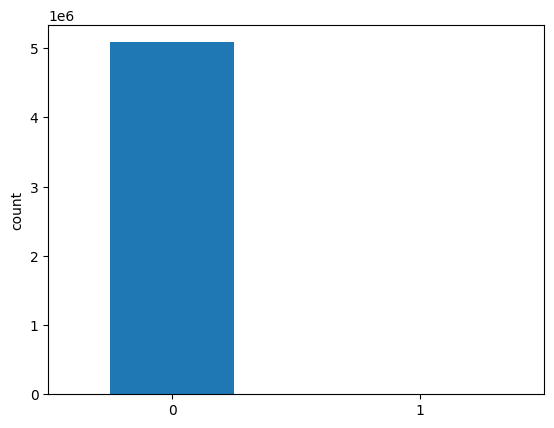

In [ ]:
y_train.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')

# Displaying Chart
plt.show()


In [ ]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

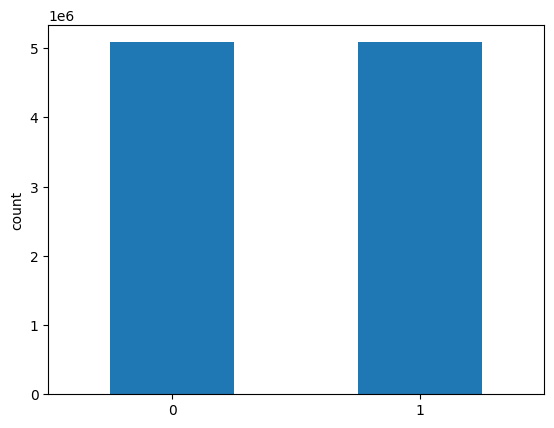

In [ ]:
y_train_resampled.value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')

# Displaying Chart
plt.show()


In [ ]:
y_train_resampled.value_counts()

0    5083503
1    5083503
Name: isFraud, dtype: int64

In [ ]:
models=[
('Gradient Boosting',GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
('Random forest',RandomForestClassifier(n_estimators=100)),
('Decision tree', DecisionTreeClassifier()),
('KNN', KNeighborsClassifier()),
('Logistic Regression', LogisticRegression()),
('XGBoost', xgb.XGBClassifier())
]

In [ ]:
#Train and Test the model

results=[]
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    confusion=classification_report(y_test, y_pred)
    results.append((name, accuracy, confusion,y_pred))
    print(name)
    print("Accuracy score: ", accuracy)
    print("Confusion Matrix: \n", confusion)

Gradient Boosting
Accuracy score:  0.9823241054785607
Confusion Matrix: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270904
           1       0.07      1.00      0.13      1620

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524

Random forest
Accuracy score:  0.9993438237707108
Confusion Matrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.67      0.95      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.84      0.98      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

Decision tree
Accuracy score:  0.9994459829441331
Confusion Matrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.71

Gradient Boosting


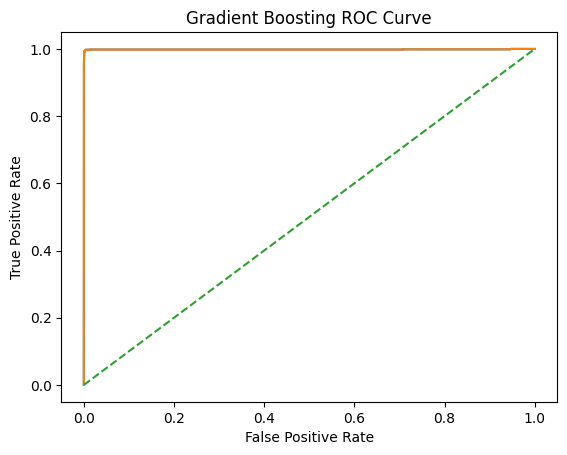

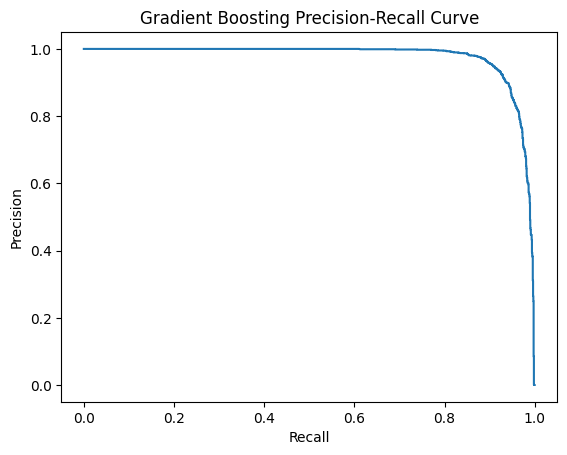

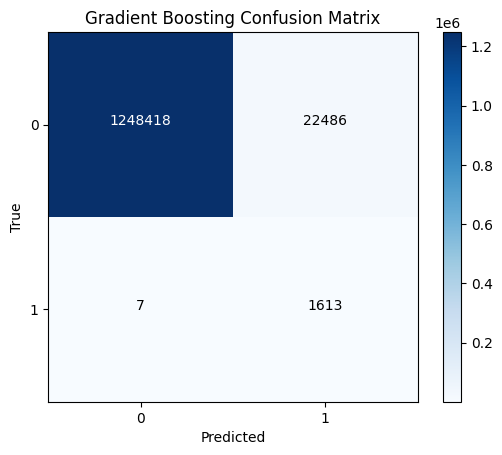

Random forest


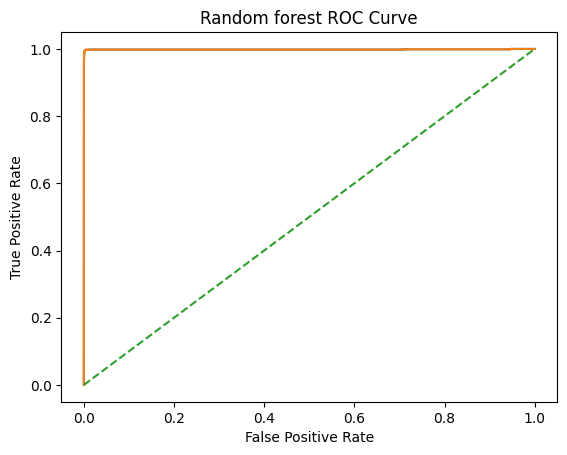

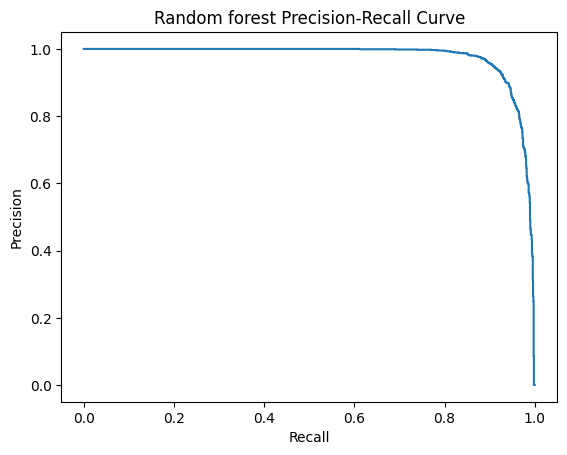

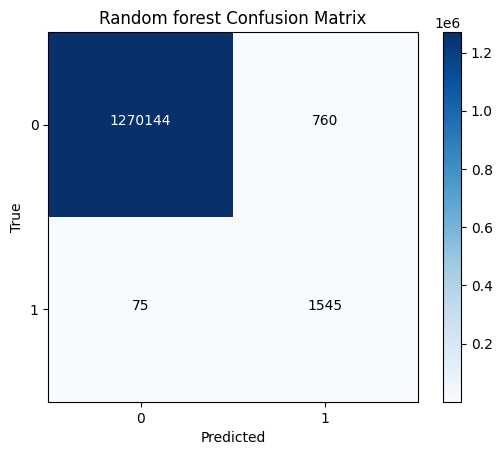

Decision tree


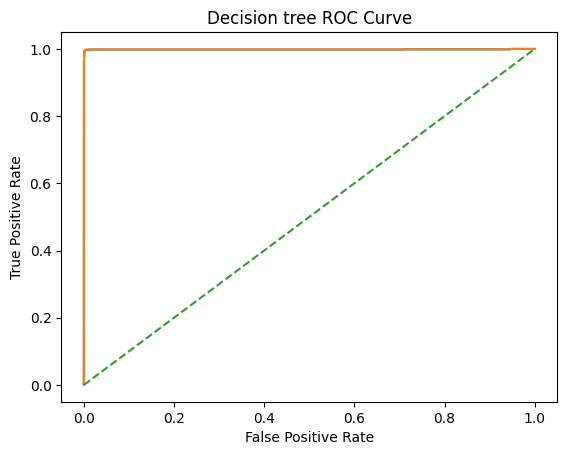

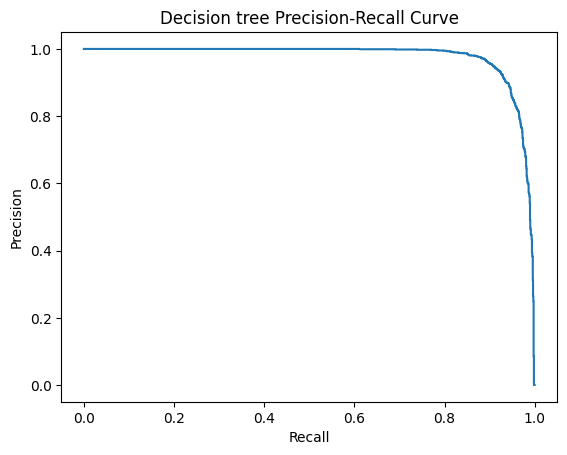

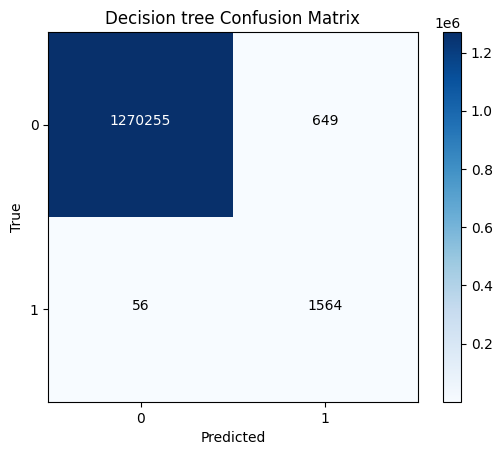

KNN


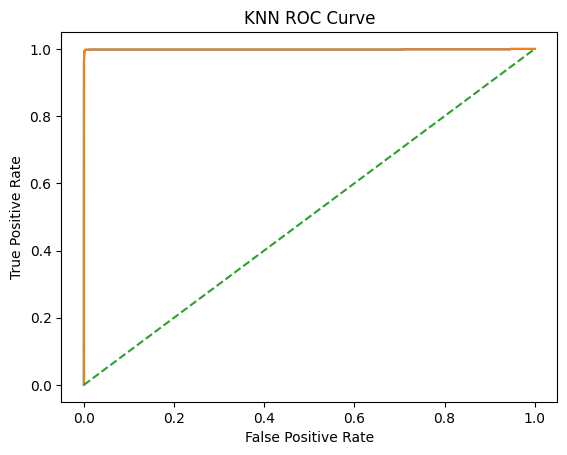

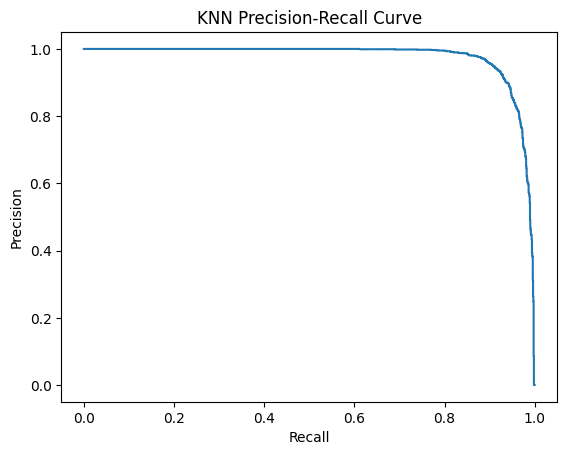

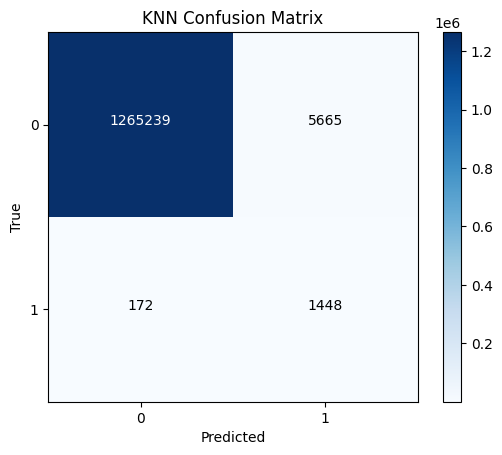

Logistic Regression


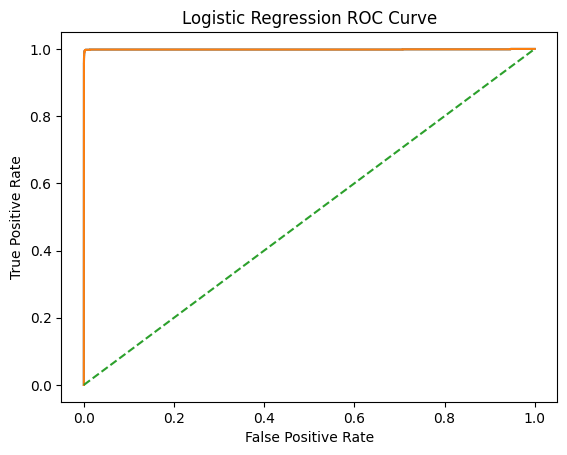

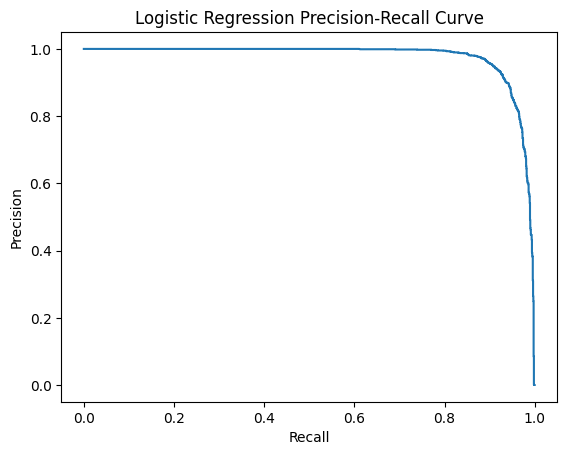

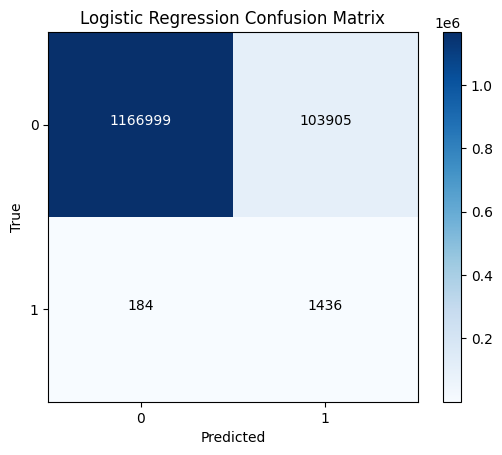

XGBoost


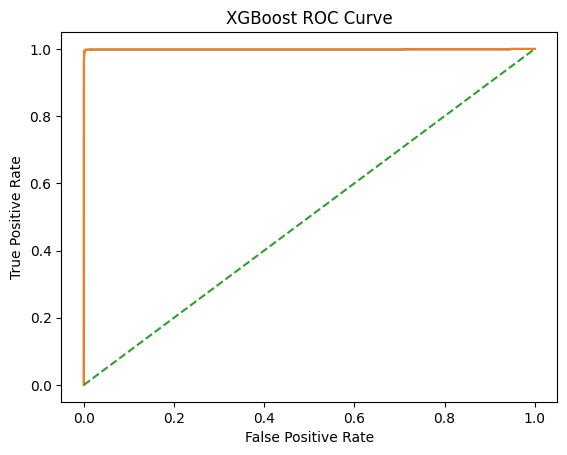

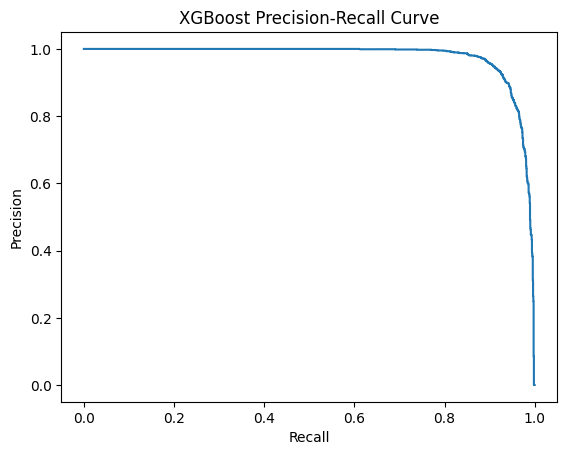

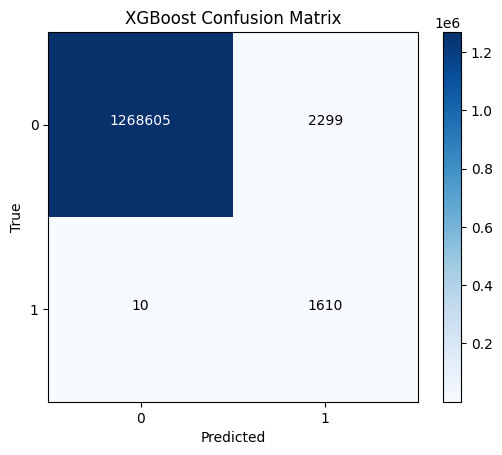

In [ ]:
from sklearn.metrics import  roc_curve, precision_recall_curve, confusion_matrix, auc
import numpy as np
import itertools

#Print results
for name, accuracy, confusion, y_pred in results:
    print(name)
    y_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
    def plot_roc_curve(y_true, y_proba):
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        # Compute the Area Under the ROC Curve (AUC-ROC)
        auc_roc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_roc)
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], '--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(name +' ROC Curve')
        plt.show()

    plot_roc_curve(y_test, y_proba)

    # Precision-Recall Curve
    def plot_precision_recall_curve(y_true, y_proba):
        precision, recall, _ = precision_recall_curve(y_true, y_proba)
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(name +' Precision-Recall Curve')
        plt.show()

    plot_precision_recall_curve(y_test, y_proba)

    # Confusion Matrix
    def plot_confusion_matrix(y_true, y_pred, classes):
        cm = confusion_matrix(y_true, y_pred)

        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()

        # Add count values in each cell
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

        plt.xticks(np.arange(len(classes)), classes)
        plt.yticks(np.arange(len(classes)), classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(name+' Confusion Matrix')
        plt.grid(False)
        plt.show()

    plot_confusion_matrix(y_test, y_pred, classes=['0', '1'])


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

for name, accuracy, confusion, y_pred in results:
  print(name,': \n')
  mcc = matthews_corrcoef(y_test, y_pred)
  print('mcc', mcc)
  f1 = f1_score(y_test, y_pred)
  print('\nf1',f1)
  precision = precision_score(y_test, y_pred)
  print('\nprecision',precision)

Gradient Boosting : 

mcc 0.25583845345248235

f1 0.12543255958629806

precision 0.06693223785219304
Random forest : 

mcc 0.7992454675514701

f1 0.7872611464968152

precision 0.6702819956616052
Decision tree : 

mcc 0.8257718992219873

f1 0.8160709626924081

precision 0.7067329417080885
KNN : 

mcc 0.42535741162568574

f1 0.33161571052330246

precision 0.2035709264726557
Logistic Regression : 

mcc 0.10412612602971025

f1 0.02685090827497873

precision 0.01363191919575474
XGBoost : 

mcc 0.6391985328392962

f1 0.5823837945378911

precision 0.4118700434893835
